# Razvrščanje e-pošte

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import numpy as np
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

## Pregled podatkov in predprocesiranje

In [29]:
# Load dataset
df = pd.read_csv('spambase.data', header=None)

print(df.shape)

(4601, 58)


Naš podatkovni okvir ima 4601 vrstic in 58 stolpcev.

In [30]:
# rename column names
df.columns = [
    'word_freq_make',
    'word_freq_address',
    'word_freq_all',
    'word_freq_3d',
    'word_freq_our',
    'word_freq_over',
    'word_freq_remove',
    'word_freq_internet',
    'word_freq_order',
    'word_freq_mail',
    'word_freq_receive',
    'word_freq_will',
    'word_freq_people',
    'word_freq_report',
    'word_freq_addresses',
    'word_freq_free',
    'word_freq_business',
    'word_freq_email',
    'word_freq_you',
    'word_freq_credit',
    'word_freq_your',
    'word_freq_font',
    'word_freq_000',
    'word_freq_money',
    'word_freq_hp',
    'word_freq_hpl',
    'word_freq_george',
    'word_freq_650',
    'word_freq_lab',
    'word_freq_labs',
    'word_freq_telnet',
    'word_freq_857',
    'word_freq_data',
    'word_freq_415',
    'word_freq_85',
    'word_freq_technology',
    'word_freq_1999',
    'word_freq_parts',
    'word_freq_pm',
    'word_freq_direct',
    'word_freq_cs',
    'word_freq_meeting',
    'word_freq_original',
    'word_freq_project',
    'word_freq_re',
    'word_freq_edu',
    'word_freq_table',
    'word_freq_conference',
    'char_freq_;',
    'char_freq_(',
    'char_freq_[',
    'char_freq_!',
    'char_freq_$',
    'char_freq_#',
    'capital_run_length_average',
    'capital_run_length_longest',
    'capital_run_length_total',
    'is_spam'
]

In [31]:
print(df.head())

   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0             0.00            0.00  ...         0.00        0.000   
1 

Primer izpisa prvih 5 vrstic podatkovnega okvirja. Prvih 57 stolpcev so atributi in zadnji stolpcev predstavlja razred, torej ali so podatki za spam (1) ali ham (0).

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

Imamo 2 spremenljivki, ki sta tipa integer (capital_run_length_total, capital_run_length_longest) in in 55 tipa float. Razred je diskretna vrednost, 0 oz. 1.

In [33]:
# Check if there are missing values
missing = df.isnull().sum()

# Printing numbers of missing values
print("Missing Values")
print(missing.sum())

Missing Values
0


V podatkovnem okvirju nimamo manjkajočih vrednosti.

In [34]:
# rename class values
df['is_spam'] = df['is_spam'].replace({0: 'ham', 1: 'spam'})

In [35]:
# Check the class distribution
class_counts = df['is_spam'].value_counts()

# Print the class distribution
print("Class distribution:")
print(class_counts)
print(df.shape)

Class distribution:
is_spam
ham     2788
spam    1813
Name: count, dtype: int64
(4601, 58)


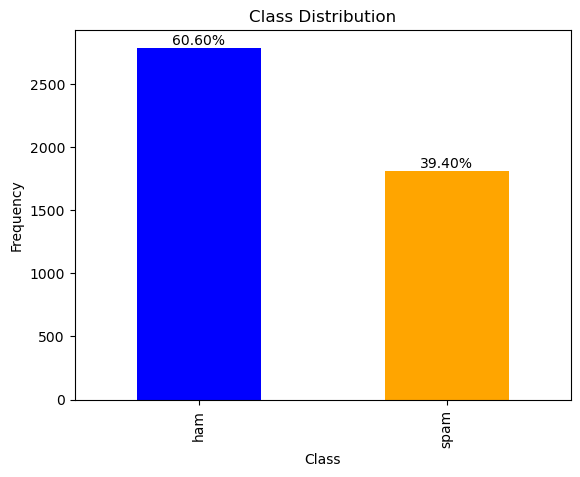

In [36]:
# Calculate counts and proportions
class_counts = df['is_spam'].value_counts()
class_proportions = class_counts / class_counts.sum()

# Plotting the class distribution
ax = class_counts.plot(kind='bar', color=['blue', 'orange'])

# Adding title and labels
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')

# Annotating the bars with proportions
for i, (count, proportion) in enumerate(zip(class_counts, class_proportions)):
    ax.text(i, count, f'{proportion:.2%}', ha='center', va='bottom')

# Display the plot
plt.show()

V podatkov okvirju imamo 2788 primerov ham (60,60%) in 1813 (39,40%) primerov spam.

In [37]:
# statistics
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


Pogledamo statistiko spremenljivk: povprečje, standardni odklon, kvantile.

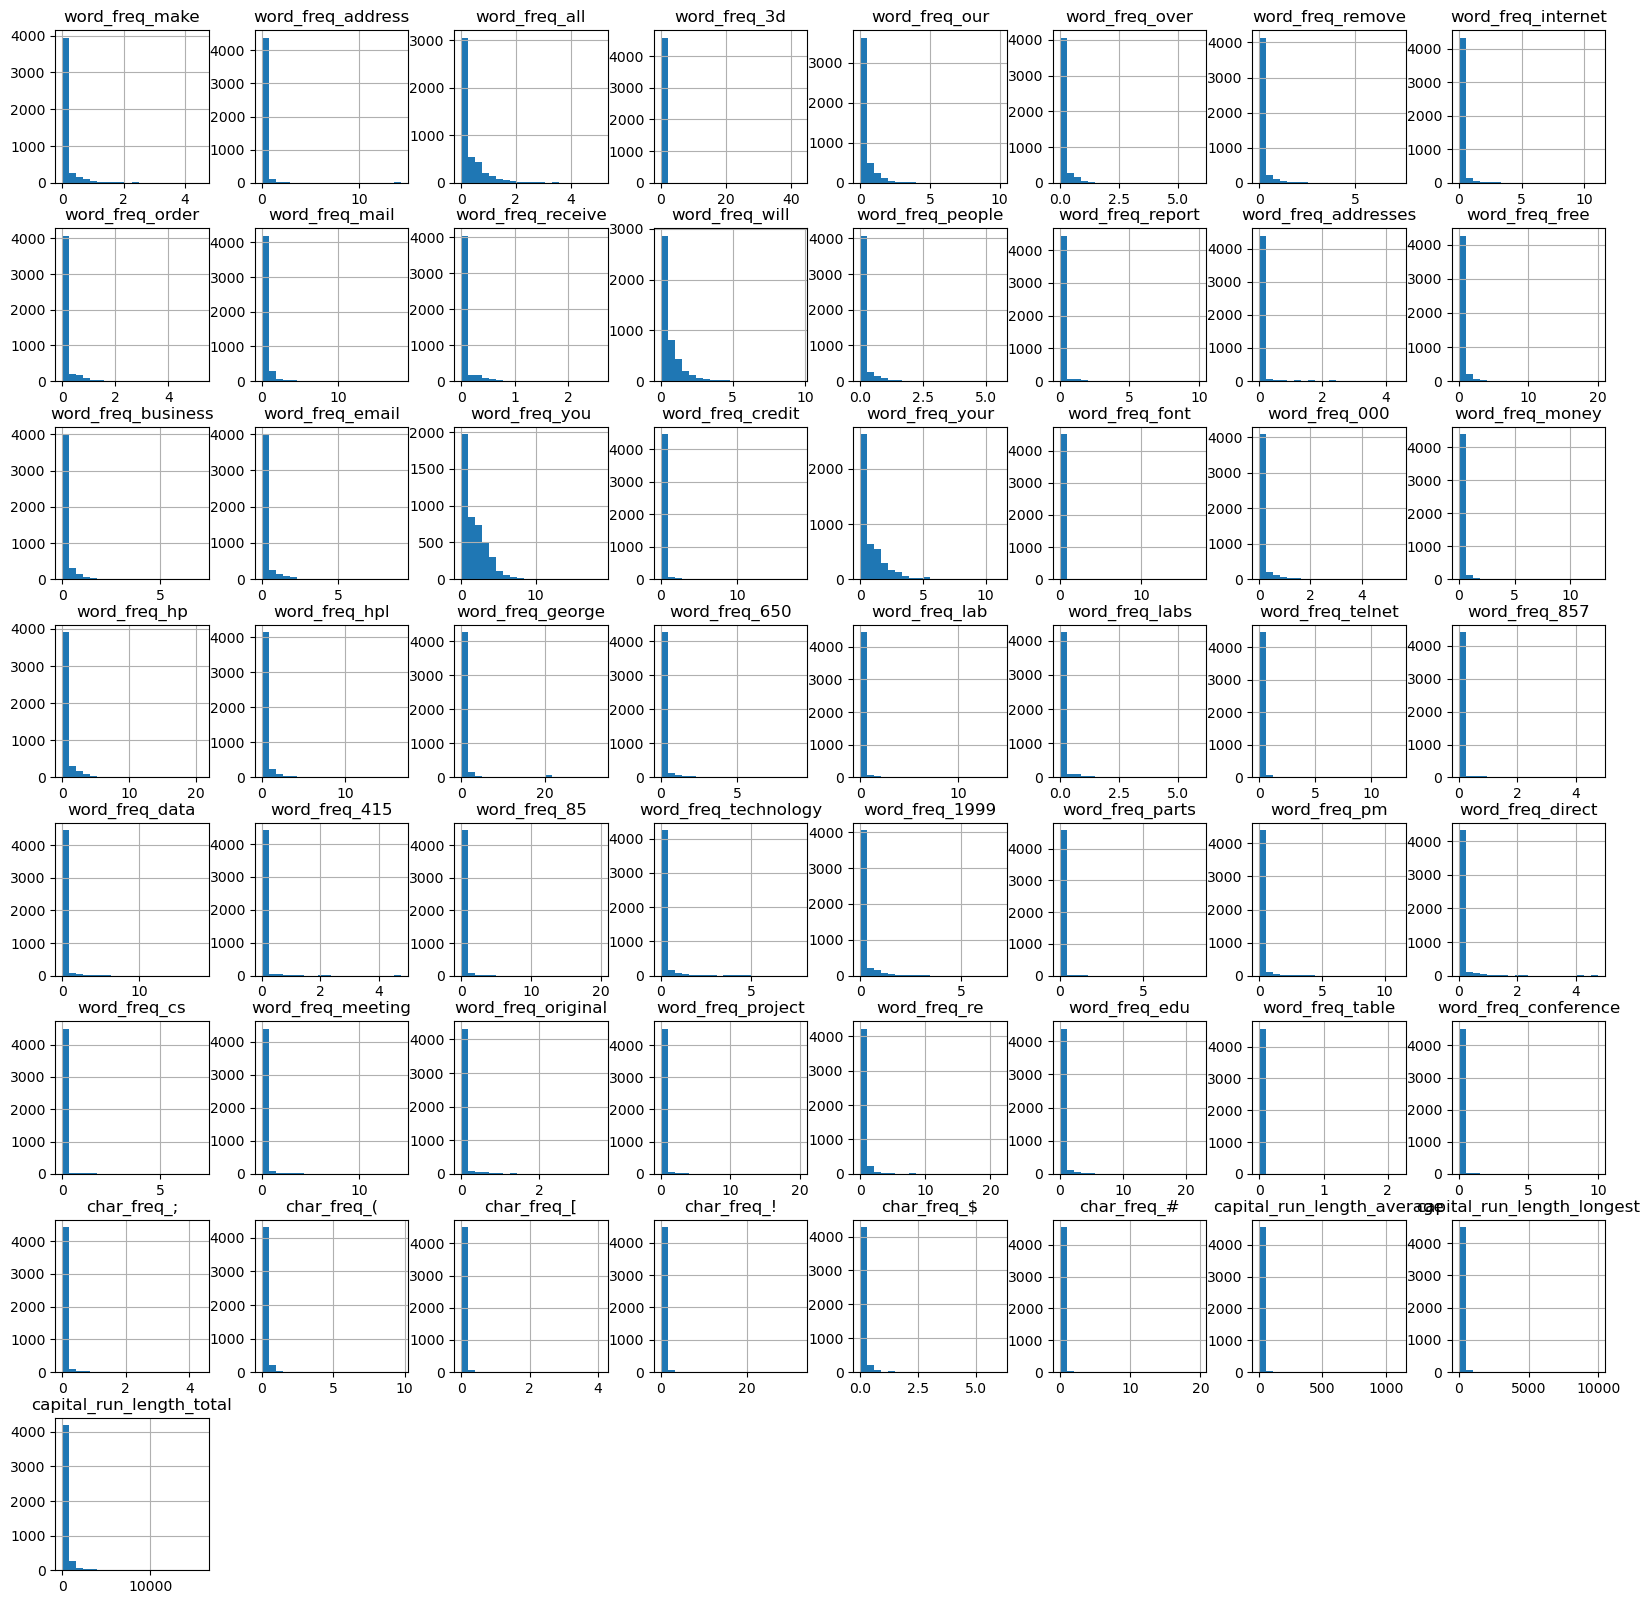

In [38]:
# distibution of vairables
df.hist(figsize=(20,20), bins=20)
plt.show()

Če pogledamo izpis porazdelitev, vidimo, da imajo vse spremenljvike podobno porazdelitev. Večinoma so vse vrednosti skoncentrirane pri majhnih vrednostih.

## Analiza

In [39]:
# Splitting the data into input features and target variable

X = df.iloc[:, :-1]  # Features are all columns except the last one
y = df.iloc[:, -1]    # Target variable is the last column

Vrednosti iz podatkovnega okvirja razdelimo na atribute in razred.

In [40]:
# Assume X contains features and y contains labels

# Use stratify to ensure an equal proportion of classes in the test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=40, stratify=y)

In [41]:
(len(X_test), len(X_train)), (len(y_test), len(y_train))

((921, 3680), (921, 3680))

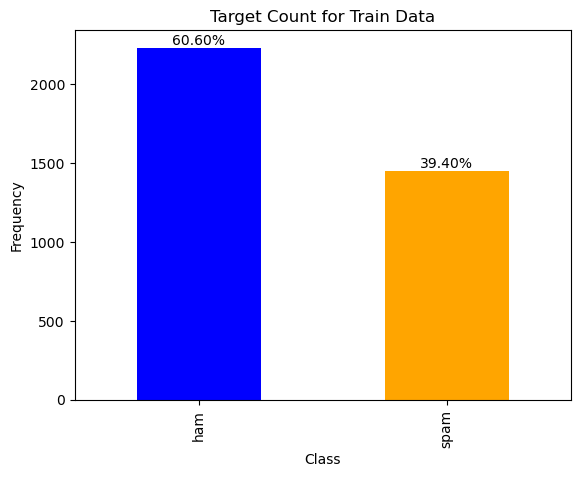

In [42]:
# Calculate counts and proportions
train_counts = y_train.value_counts()
train_proportions = train_counts / train_counts.sum()

# Plotting the class distribution using matplotlib
ax = train_counts.plot(kind='bar', color=['blue', 'orange'])

# Adding title and labels
plt.title('Target Count for Train Data')
plt.xlabel('Class')
plt.ylabel('Frequency')

# Annotating the bars with proportions
for i, (count, proportion) in enumerate(zip(train_counts, train_proportions)):
    ax.text(i, count, f'{proportion:.2%}', ha='center', va='bottom')

# Display the plot
plt.show()

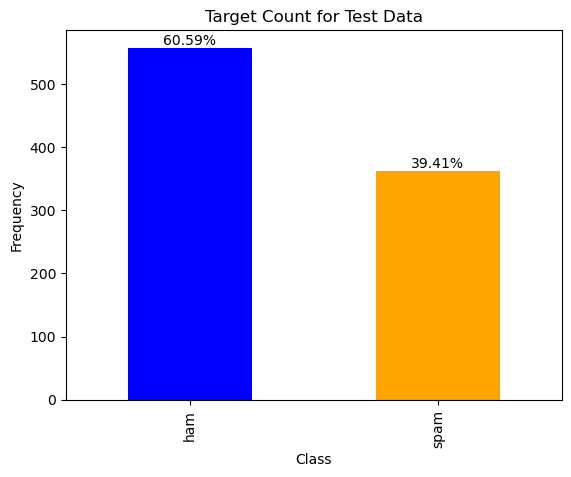

In [43]:
# Calculate counts and proportions
test_counts = y_test.value_counts()
test_proportions = test_counts / test_counts.sum()

# Plotting the class distribution using matplotlib
ax = test_counts.plot(kind='bar', color=['blue', 'orange'])

# Adding title and labels
plt.title('Target Count for Test Data')
plt.xlabel('Class')
plt.ylabel('Frequency')

# Annotating the bars with proportions
for i, (count, proportion) in enumerate(zip(test_counts, test_proportions)):
    ax.text(i, count, f'{proportion:.2%}', ha='center', va='bottom')

# Display the plot
plt.show()

Podatke smo razdelili na učno in testno množico. Iz stolpičnih grafov ugotovimo, da imamo primerno porazdelitev glede na začetni vzorec, tj. enak delež ham in spam kot v začetnem vzorcu.

In [44]:
# Decision Tree, default parameters
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
print("Test set accuracy: ", dt_model.score(X_test, y_test))

Test set accuracy:  0.9001085776330076


In [59]:
# Decision Tree, criterion = entropy & max_depth=5
dt_d5_model = DecisionTreeClassifier(max_depth=5)
dt_d5_model.fit(X_train, y_train)
dt_d5_pred = dt_d5_model.predict(X_test)
print("Test set accuracy: ", dt_d5_model.score(X_test, y_test))

Test set accuracy:  0.9022801302931596


In [45]:
# Decision Tree, criterion = entropy
dt_ent_model = DecisionTreeClassifier(criterion='entropy')
dt_ent_model.fit(X_train, y_train)
dt_ent_pred = dt_ent_model.predict(X_test)
print("Test set accuracy: ", dt_ent_model.score(X_test, y_test))

Test set accuracy:  0.9120521172638436


In [46]:
# Decision Tree, criterion = entropy & max_depth=5
dt_ent_d5_model = DecisionTreeClassifier(max_depth=5, criterion='entropy')
dt_ent_d5_model.fit(X_train, y_train)
dt_ent_d5_pred = dt_ent_d5_model.predict(X_test)
print("Test set accuracy: ", dt_ent_d5_model.score(X_test, y_test))

Test set accuracy:  0.9098805646036916


In [48]:
# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20, 25, 30]
}

# Initialize the decision tree classifier
clf = DecisionTreeClassifier()

# Use GridSearchCV to search for the best parameters
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Evaluate the best model on test data
dt_best_model = grid_search.best_estimator_
dt_best_pred = dt_best_model.predict(X_test)
print("Test set accuracy: ", dt_best_model.score(X_test, y_test))

Best parameters found:  {'criterion': 'entropy', 'max_depth': None, 'splitter': 'best'}
Test set accuracy:  0.9185667752442996


Za odločitveno drevo smo poiskali najboljše parametre. Izbirali smo med parametri: 
- mere nečistoč: Gini in entropija, 
- deljenje podatkov glede na 'best' in 'random' ter 
- največjo globino drevesa: dokler so vsi listi čisti, 5, 10, 15, 20, 25 in 30.

Za izbiro smo uporabili cross-validacijo.

In [49]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [50]:
# standardization for Naive Bayes
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [51]:
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_std, y_train)
nb_pred = nb_model.predict(X_test_std)

Naredili smo smo 5 primerov odločitvenih dreves z različnimi kriteriji in izračunali točnost modela. Naredili smo primer modela Random forest in Naivni Bayes s privzetimi nastavitvami.

# Evalvacija modelov

Naredimo primerjavo modelov, kako točno uspe model napovedati razred. Za vsak model imamo izpis ocenjevalnih vrednosti. Za vsak model smo izpisali število pravilnih napovedi, število lažno negativnih in lažno pozitivnih rezultatov razvrstitve. 

Decision Tree default Accuracy: 0.9001085776330076
Confusion Matrix:
 [[513  45]
 [ 47 316]]
Classification Report:
               precision    recall  f1-score   support

         ham       0.92      0.92      0.92       558
        spam       0.88      0.87      0.87       363

    accuracy                           0.90       921
   macro avg       0.90      0.89      0.90       921
weighted avg       0.90      0.90      0.90       921

__________________________________________________________________


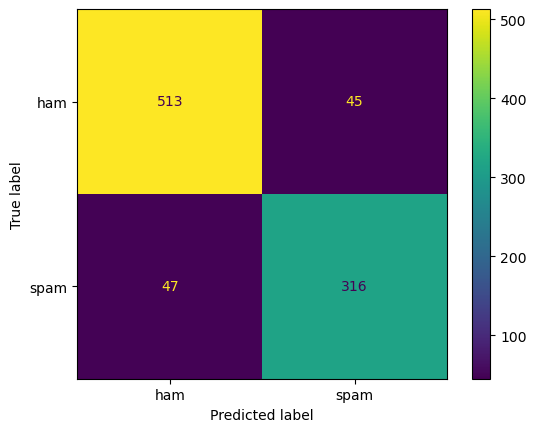

<Figure size 800x600 with 0 Axes>

Decision Tree entropy Accuracy: 0.9120521172638436
Confusion Matrix:
 [[508  50]
 [ 31 332]]
Classification Report:
               precision    recall  f1-score   support

         ham       0.94      0.91      0.93       558
        spam       0.87      0.91      0.89       363

    accuracy                           0.91       921
   macro avg       0.91      0.91      0.91       921
weighted avg       0.91      0.91      0.91       921

__________________________________________________________________


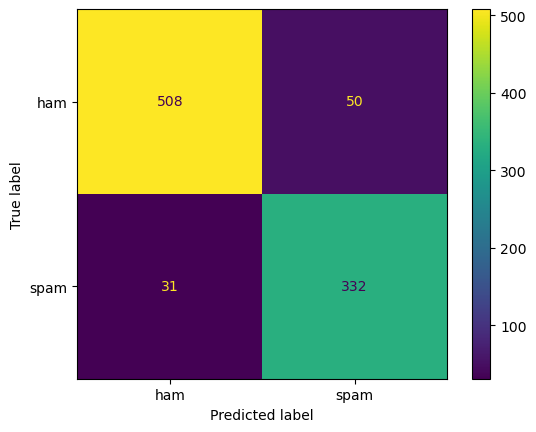

<Figure size 800x600 with 0 Axes>

Decision Tree maxdepth=5 Accuracy: 0.9022801302931596
Confusion Matrix:
 [[532  26]
 [ 64 299]]
Classification Report:
               precision    recall  f1-score   support

         ham       0.89      0.95      0.92       558
        spam       0.92      0.82      0.87       363

    accuracy                           0.90       921
   macro avg       0.91      0.89      0.90       921
weighted avg       0.90      0.90      0.90       921

__________________________________________________________________


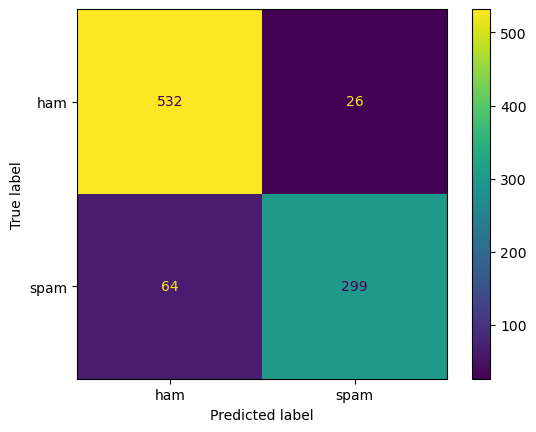

<Figure size 800x600 with 0 Axes>

Decision Tree entropy & maxdepth=5 Accuracy: 0.9066232356134636
Confusion Matrix:
 [[536  22]
 [ 64 299]]
Classification Report:
               precision    recall  f1-score   support

         ham       0.89      0.96      0.93       558
        spam       0.93      0.82      0.87       363

    accuracy                           0.91       921
   macro avg       0.91      0.89      0.90       921
weighted avg       0.91      0.91      0.91       921

__________________________________________________________________


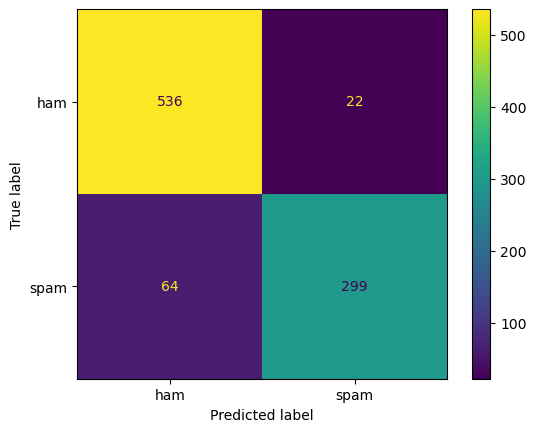

<Figure size 800x600 with 0 Axes>

Decision Tree best parameters Accuracy: 0.9185667752442996
Confusion Matrix:
 [[512  46]
 [ 29 334]]
Classification Report:
               precision    recall  f1-score   support

         ham       0.95      0.92      0.93       558
        spam       0.88      0.92      0.90       363

    accuracy                           0.92       921
   macro avg       0.91      0.92      0.92       921
weighted avg       0.92      0.92      0.92       921

__________________________________________________________________


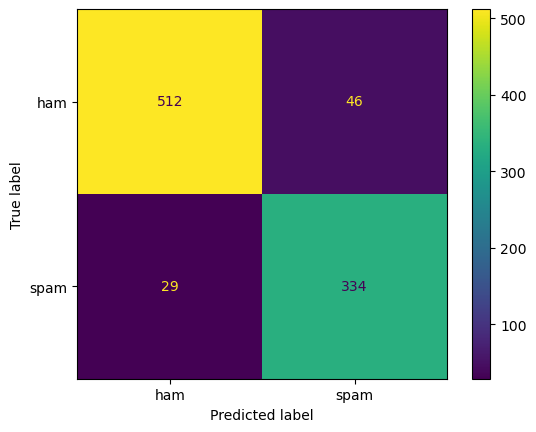

<Figure size 800x600 with 0 Axes>

Random Forest Accuracy: 0.9489685124864278
Confusion Matrix:
 [[538  20]
 [ 27 336]]
Classification Report:
               precision    recall  f1-score   support

         ham       0.95      0.96      0.96       558
        spam       0.94      0.93      0.93       363

    accuracy                           0.95       921
   macro avg       0.95      0.94      0.95       921
weighted avg       0.95      0.95      0.95       921

__________________________________________________________________


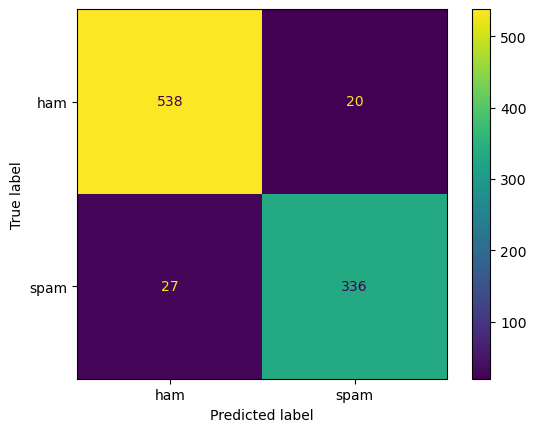

<Figure size 800x600 with 0 Axes>

Naive Bayes Accuracy: 0.8262757871878393
Confusion Matrix:
 [[408 150]
 [ 10 353]]
Classification Report:
               precision    recall  f1-score   support

         ham       0.98      0.73      0.84       558
        spam       0.70      0.97      0.82       363

    accuracy                           0.83       921
   macro avg       0.84      0.85      0.83       921
weighted avg       0.87      0.83      0.83       921

__________________________________________________________________


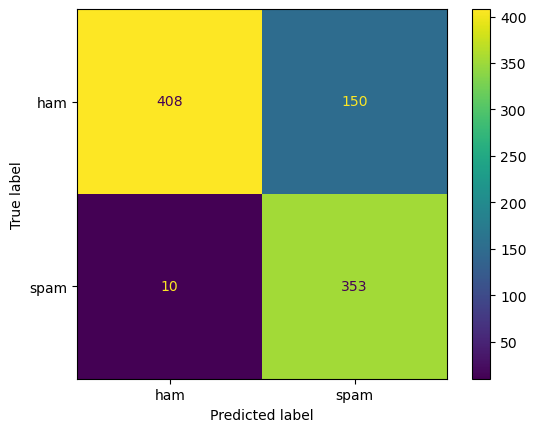

<Figure size 800x600 with 0 Axes>

In [62]:
models = ["Decision Tree default", "Decision Tree entropy", "Decision Tree maxdepth=5", "Decision Tree entropy & maxdepth=5", "Decision Tree best parameters", "Random Forest", "Naive Bayes"]
predictions = [dt_pred, dt_ent_pred, dt_d5_pred, dt_ent_d5_pred, dt_best_pred, rf_pred, nb_pred]
mod = [dt_model, dt_ent_model, dt_d5_model, dt_ent_d5_model, dt_best_model, rf_model, nb_model]

accuracies = []

# Calculate accuracies and append to a list
for model, pred, mod in zip(models, predictions, mod):
    accuracy = accuracy_score(y_test, pred)
    conf_matrix = confusion_matrix(y_test, pred) 
    classification_rep = classification_report(y_test, pred) 

    accuracies.append(accuracy)
    print(f"{model} Accuracy: {accuracy}")
    print("Confusion Matrix:\n", conf_matrix) 
    print("Classification Report:\n", classification_rep) 
    print("__________________________________________________________________")

    # confusion matrix 
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=mod.classes_)
    disp.plot()
    plt.figure(figsize=(8, 6))
    plt.show()

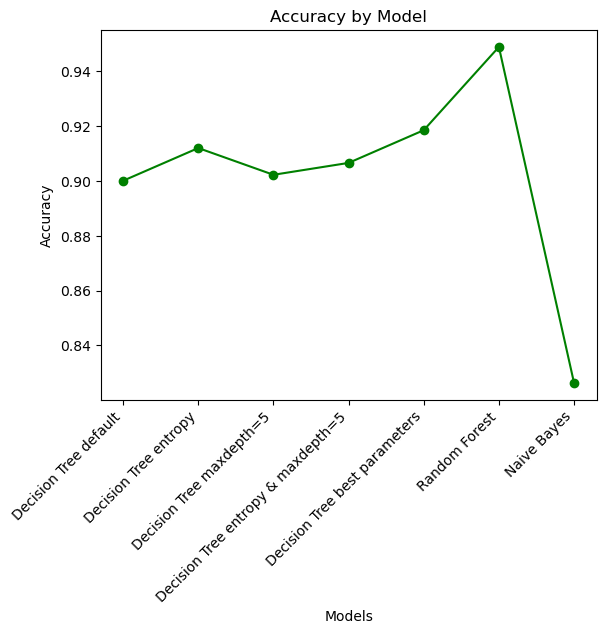

In [70]:
plt.plot(models, accuracies, marker='o', color='green', linestyle='-')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy by Model')
plt.xticks(rotation=45, ha='right')  
plt.show()

Ugotovimo, da najbolše rezultate dobimo z Random Forest. Med odločitvenimi drevesi dobimo najboljše vrednosti z modelom, kjer smo s cross-validacijo preverili in uporabili nabor najprimernejših parametrov. Podobno točnost dobimo z modelom, kjer uporabimo privzete nastavitve odločitvenih dreves z izjemo določanja mere nečistoč z entropijo namesto z Gini indeksi. V našem primeru dobimo najslaše rezultate s privzetimi vrednostmi naivnega Bayesa.

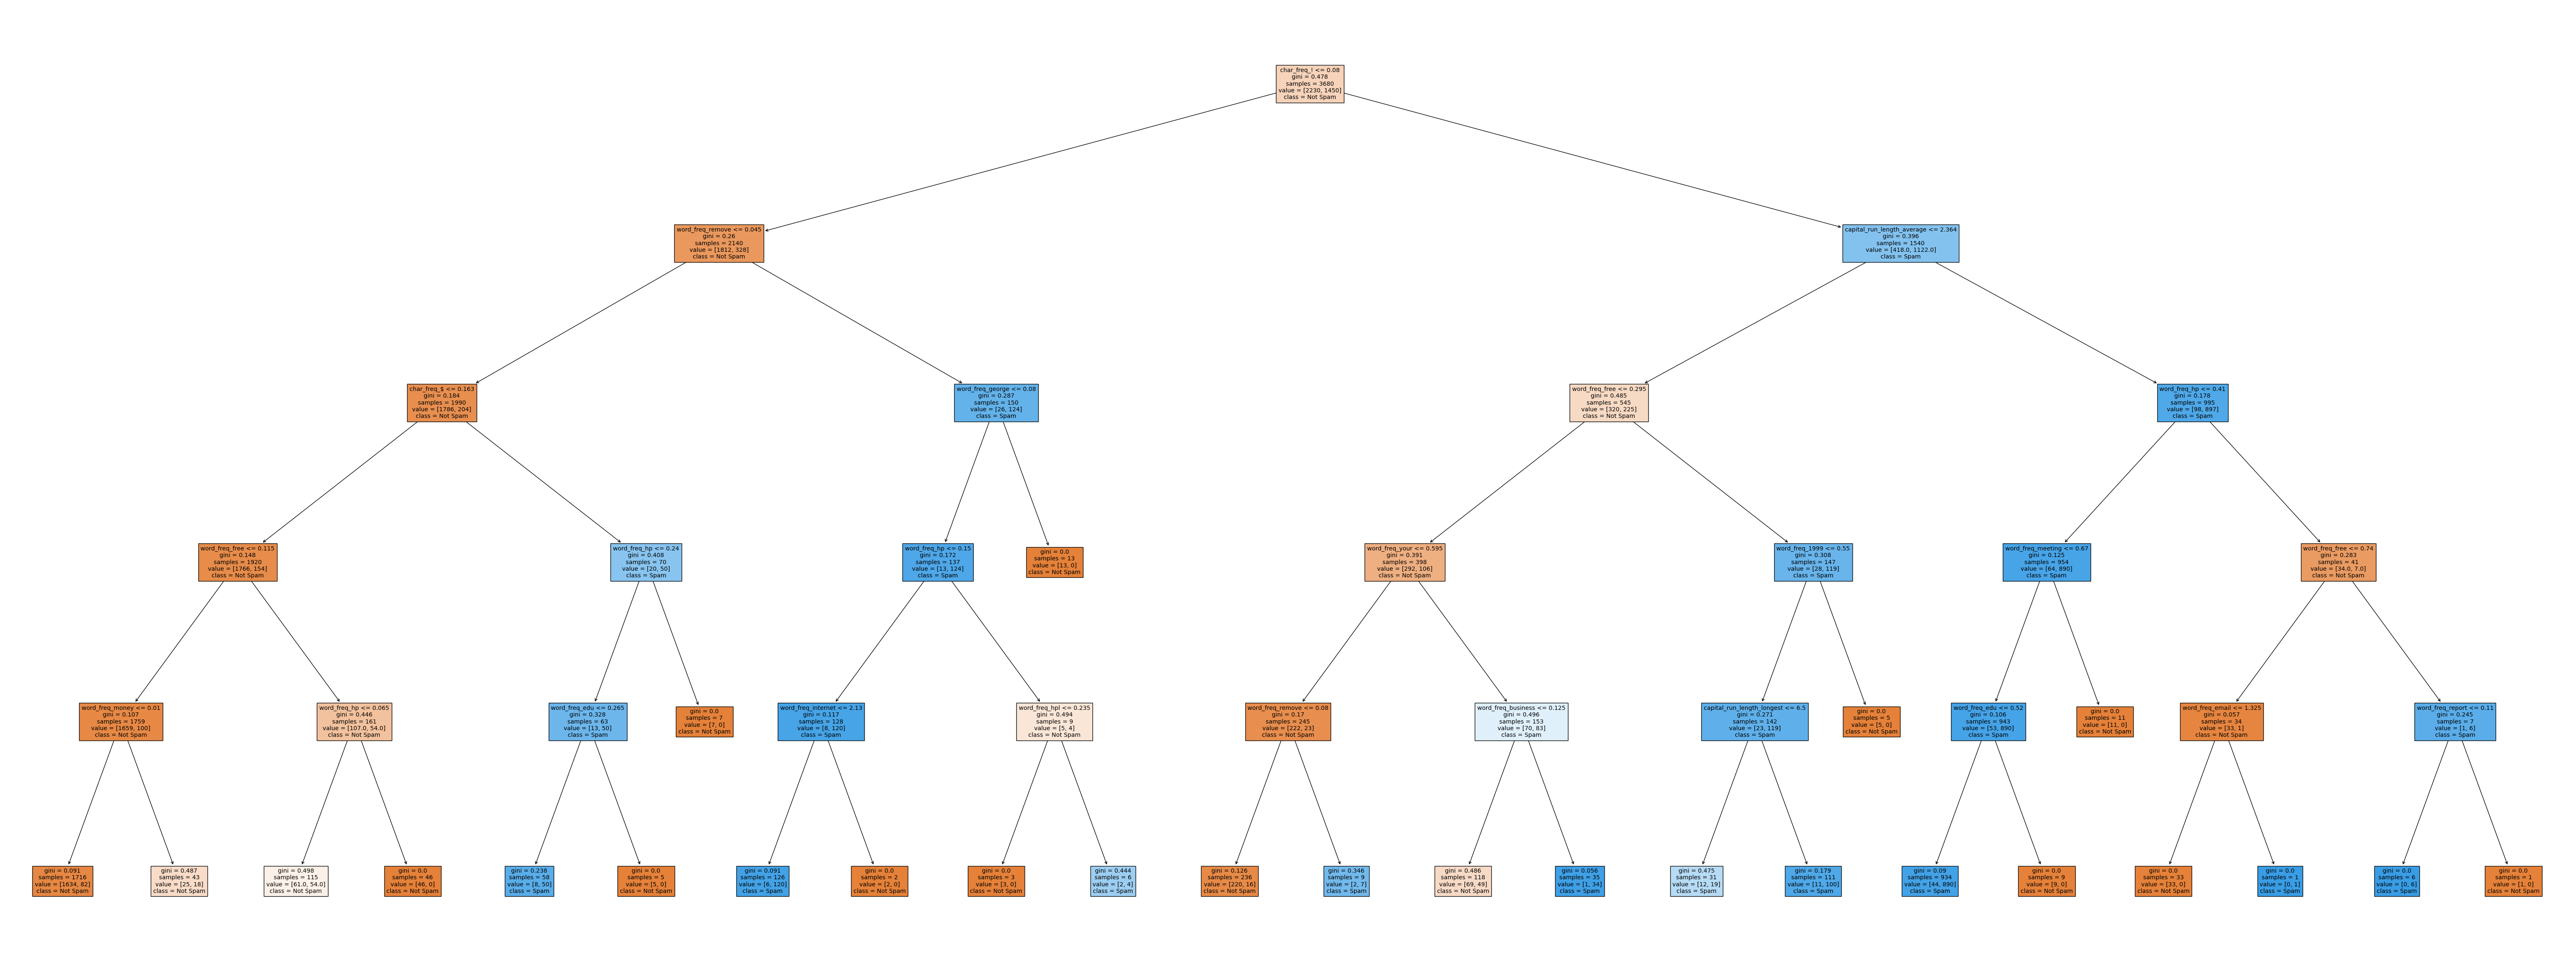

In [72]:
plt.figure(figsize=(80,30)) 
plot_tree(dt_d5_model, feature_names=X_train.columns, class_names=['Not Spam', 'Spam'], filled=True)
plt.show()

Na sliki je primer prikaza odločitvenega drevesa z določeno največjo globino, 5. Opazimo, da imamo v tem primeru že nekaj čistih listov. Prvi atribut po katerem začnemo deliti drevo je char_freq_!, torej glede na frekvenco '!' v e-poštnem sporočilu. 